In [10]:
#Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split  
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder

**READING DATASET**

In [11]:
# Load the iris dataset
iris_df = pd.read_csv('Iris.csv')
iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris_df.shape

(150, 6)

In [13]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**CHECKING NULL VALUES**

In [14]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Input data visualization**

In [15]:
sns.set_style('whitegrid')

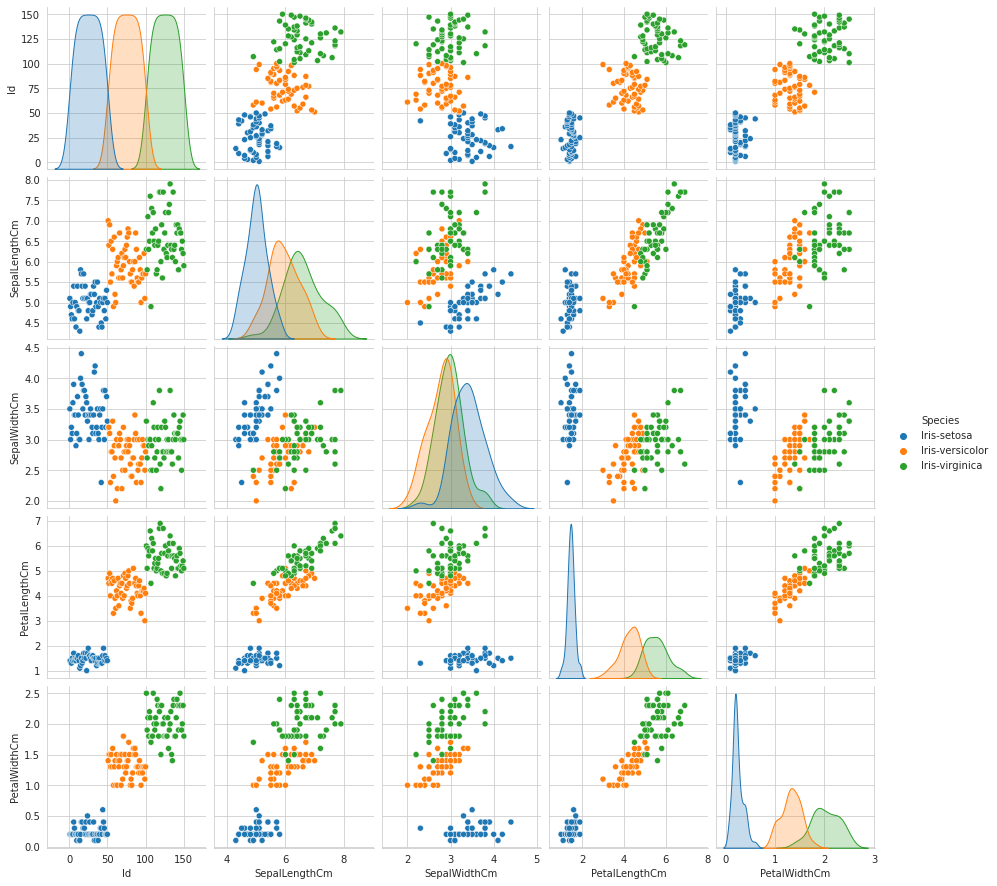

In [ ]:
sns.pairplot(iris_df, hue='Species')

**Finding the correlation matrix**

In [16]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


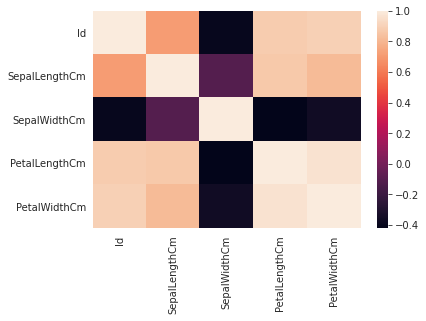

In [17]:
sns.heatmap(iris_df.corr())

**Label encoding**

In [18]:
LE = LabelEncoder()

iris_df_LE = iris_df 
iris_df_LE.Species = LE.fit_transform(iris_df_LE.Species)

for col in iris_df_LE.columns:
    print(col,':',len(iris_df_LE[col].unique()),'labels')

Id : 150 labels
SepalLengthCm : 35 labels
SepalWidthCm : 23 labels
PetalLengthCm : 43 labels
PetalWidthCm : 22 labels
Species : 3 labels


**SPLITTING DATA**

In [19]:
# Independent variables 
X=iris_df.iloc[:,1:5]

# Dependent variable
Y=iris_df['Species']

print(X.shape,Y.shape)

(150, 4) (150,)


In [20]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

**SPLITTING INTO TEST & TRAIN**

In [21]:
# Spliting in TEST & TRAIN
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0,stratify=Y)

In [22]:
# For checking the distribution in the training dataset
y_train=pd.Series(y_train)
y_train.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: Species, dtype: float64

**TRAINING MODEL**

In [23]:
dtree_clf=DecisionTreeClassifier(criterion = "entropy")
dtree_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Classification Report**

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=dtree_clf.predict(x_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



**VISUALIZING TREE**

In [25]:
# Import necessary libraries for graph viz
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [26]:
features=list(iris_df.columns)

In [27]:
dot_data = StringIO()

In [28]:
export_graphviz(decision_tree=dtree_clf, out_file=dot_data, feature_names=['SepalLenCm','SepalWidCm','PetalLenCm', 'PetalWidCm'],  
                filled=True, rounded=True,
                special_characters=True)

In [29]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

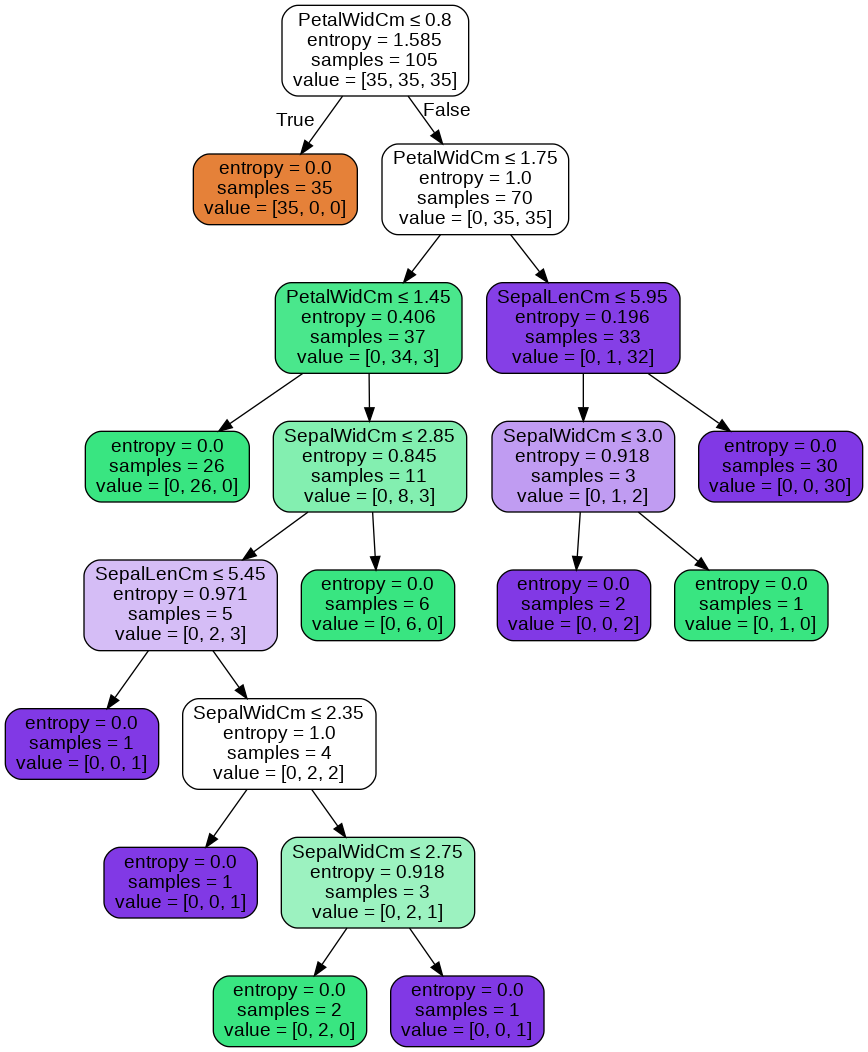

In [30]:
import pydot
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**PREDICTION**

In [31]:
y_pred=dtree_clf.predict(x_test)

In [32]:
#Checking Misclassification
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  2, 13]])

In [33]:
dtree_clf.score(x_test,y_test)

0.9111111111111111

**INFERENCE:**
Model was built as per the probem statement and the accuracy score of the model is 91.11%. with the testing data.